In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib


In [2]:
df=pd.read_csv("hockey.csv")

In [3]:
df.head()

,Team Name,Year,Wins,Losses,OT_Losses,Win %,Goals_For,Goals_Against,Goal_Diff
0,Boston Bruins,1990,44,24,0,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,0,0.388,292,278,14
2,Calgary Flames,1990,46,26,0,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,0,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,0,0.425,273,298,-25


In [4]:
df.tail()

,Team Name,Year,Wins,Losses,OT_Losses,Win %,Goals_For,Goals_Against,Goal_Diff
577,Tampa Bay Lightning,2011,38,36,8,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9,0.622,249,198,51
580,Washington Capitals,2011,42,32,8,0.512,222,230,-8
581,Winnipeg Jets,2011,37,35,10,0.451,225,246,-21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Team Name      582 non-null    object 
 1   Year           582 non-null    int64  
 2   Wins           582 non-null    int64  
 3   Losses         582 non-null    int64  
 4   OT_Losses      582 non-null    int64  
 5   Win %          582 non-null    float64
 6   Goals_For      582 non-null    int64  
 7   Goals_Against  582 non-null    int64  
 8   Goal_Diff      582 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 41.1+ KB


In [6]:
df.isnull().sum()

Team Name        0
Year             0
Wins             0
Losses           0
OT_Losses        0
Win %            0
Goals_For        0
Goals_Against    0
Goal_Diff        0
dtype: int64

In [7]:
df.isna().sum()

Team Name        0
Year             0
Wins             0
Losses           0
OT_Losses        0
Win %            0
Goals_For        0
Goals_Against    0
Goal_Diff        0
dtype: int64

In [8]:
print(df.duplicated().sum())

0


In [9]:
df.loc[df.duplicated(subset='Team Name')]

,Team Name,Year,Wins,Losses,OT_Losses,Win %,Goals_For,Goals_Against,Goal_Diff
21,Boston Bruins,1991,36,32,0,0.450,270,275,-5
22,Buffalo Sabres,1991,31,37,0,0.388,289,299,-10
23,Calgary Flames,1991,31,37,0,0.388,296,305,-9
24,Chicago Blackhawks,1991,36,29,0,0.450,257,236,21
25,Detroit Red Wings,1991,43,25,0,0.537,320,256,64
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9,0.622,249,198,51
580,Washington Capitals,2011,42,32,8,0.512,222,230,-8


## Total Amount of Wins for Each Team


In [10]:
df.groupby('Team Name')['Wins'].sum().sort_values(ascending=False)

Team Name
Detroit Red Wings          986
New Jersey Devils          905
Pittsburgh Penguins        839
Philadelphia Flyers        836
Boston Bruins              816
Vancouver Canucks          815
St. Louis Blues            811
Washington Capitals        806
Buffalo Sabres             803
New York Rangers           792
Montreal Canadiens         783
Toronto Maple Leafs        767
Chicago Blackhawks         765
Calgary Flames             764
Dallas Stars               752
Los Angeles Kings          730
San Jose Sharks            721
Edmonton Oilers            692
Ottawa Senators            679
Colorado Avalanche         677
New York Islanders         650
Tampa Bay Lightning        588
Florida Panthers           573
Phoenix Coyotes            557
Carolina Hurricanes        515
Nashville Predators        503
Minnesota Wild             405
Mighty Ducks of Anaheim    381
Atlanta Thrashers          342
Columbus Blue Jackets      342
Anaheim Ducks              257
Winnipeg Jets              21

## Total Amount Of Losses For Each Team

In [11]:
df.groupby('Team Name')['Losses'].sum().sort_values(ascending=False)

Team Name
New York Islanders         819
Edmonton Oilers            758
Tampa Bay Lightning        732
Los Angeles Kings          707
Toronto Maple Leafs        695
New York Rangers           678
Calgary Flames             675
Chicago Blackhawks         675
San Jose Sharks            672
Montreal Canadiens         667
Washington Capitals        662
Ottawa Senators            651
Buffalo Sabres             648
Pittsburgh Penguins        642
Vancouver Canucks          642
St. Louis Blues            626
Boston Bruins              614
Florida Panthers           605
Philadelphia Flyers        598
New Jersey Devils          564
Phoenix Coyotes            498
Dallas Stars               487
Detroit Red Wings          480
Colorado Avalanche         462
Carolina Hurricanes        461
Columbus Blue Jackets      441
Atlanta Thrashers          437
Mighty Ducks of Anaheim    427
Nashville Predators        424
Minnesota Wild             362
Hartford Whalers           281
Winnipeg Jets              26

## Team Win Percentage

In [12]:
win_percentage = df.groupby('Team Name')[['Wins', 'Losses']].sum().reset_index()
win_percentage['net_win_pct'] = win_percentage['Wins'] / (win_percentage['Wins'] + win_percentage['Losses'])
win_percentage=win_percentage.sort_values(by='net_win_pct',ascending=False)
print(win_percentage)


                  Team Name  Wins  Losses  net_win_pct
10        Detroit Red Wings   986     480     0.672578
20        New Jersey Devils   905     564     0.616065
9              Dallas Stars   752     487     0.606941
7        Colorado Avalanche   677     462     0.594381
0             Anaheim Ducks   257     178     0.590805
24      Philadelphia Flyers   836     598     0.582985
2             Boston Bruins   816     614     0.570629
26      Pittsburgh Penguins   839     642     0.566509
29          St. Louis Blues   811     626     0.564370
32        Vancouver Canucks   815     642     0.559369
3            Buffalo Sabres   803     648     0.553411
33      Washington Capitals   806     662     0.549046
19      Nashville Predators   503     424     0.542611
18       Montreal Canadiens   783     667     0.540000
22         New York Rangers   792     678     0.538776
6        Chicago Blackhawks   765     675     0.531250
4            Calgary Flames   764     675     0.530924
17        

In [13]:
top_teams=win_percentage.nlargest(5,'net_win_pct')
print(top_teams)

             Team Name  Wins  Losses  net_win_pct
10   Detroit Red Wings   986     480     0.672578
20   New Jersey Devils   905     564     0.616065
9         Dallas Stars   752     487     0.606941
7   Colorado Avalanche   677     462     0.594381
0        Anaheim Ducks   257     178     0.590805


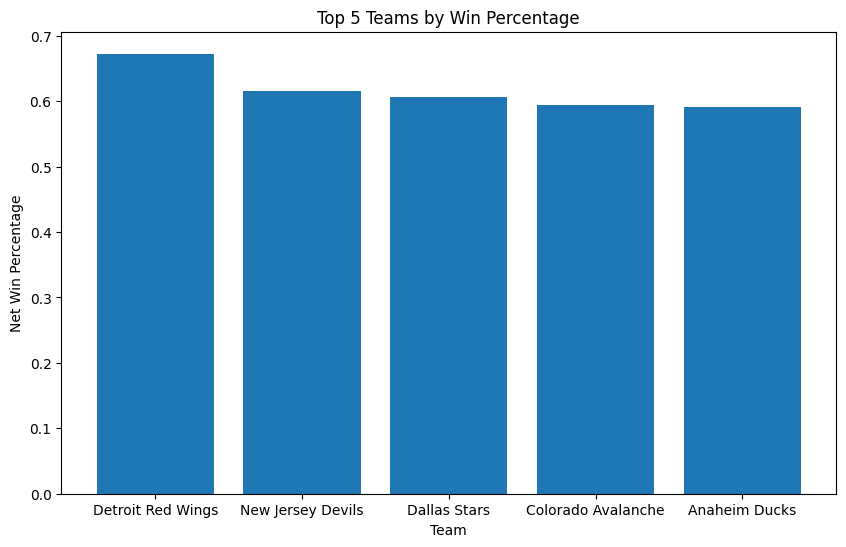

In [14]:
plt.figure(figsize=(10,6))
plt.bar(top_teams['Team Name'],top_teams['net_win_pct'])
plt.xlabel('Team')
plt.ylabel('Net Win Percentage')
plt.title('Top 5 Teams by Win Percentage')
plt.show()

## EDA

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,582.0,2000.907216,6.330674,1990.000,1996.00,2001.000,2007.000,2011.000
Wins,582.0,36.943299,8.926081,9.000,31.00,38.000,43.000,62.000
Losses,582.0,32.353952,8.411439,11.000,27.00,31.000,37.000,71.000
OT_Losses,582.0,4.589347,4.605402,0.000,0.00,4.000,8.000,18.000
Win %,582.0,0.458519,0.102237,0.119,0.39,0.463,0.534,0.756
Goals_For,582.0,234.063574,40.548915,115.000,211.00,231.000,254.000,369.000
Goals_Against,582.0,234.063574,42.510718,115.000,207.00,232.500,258.750,414.000
Goal_Diff,582.0,0.000000,45.277458,-196.000,-27.00,4.000,31.000,144.000


Displaying absolute correlations above the threshold (0.3). Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

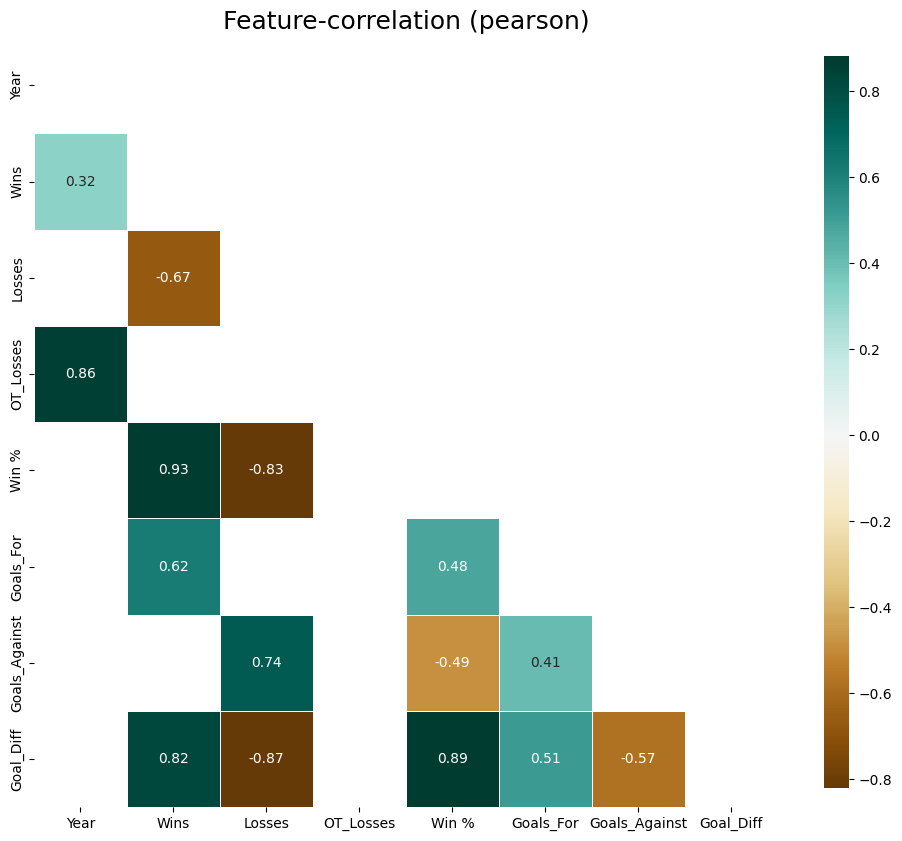

In [16]:
klib.corr_plot(data=df,split='high',annot=True)

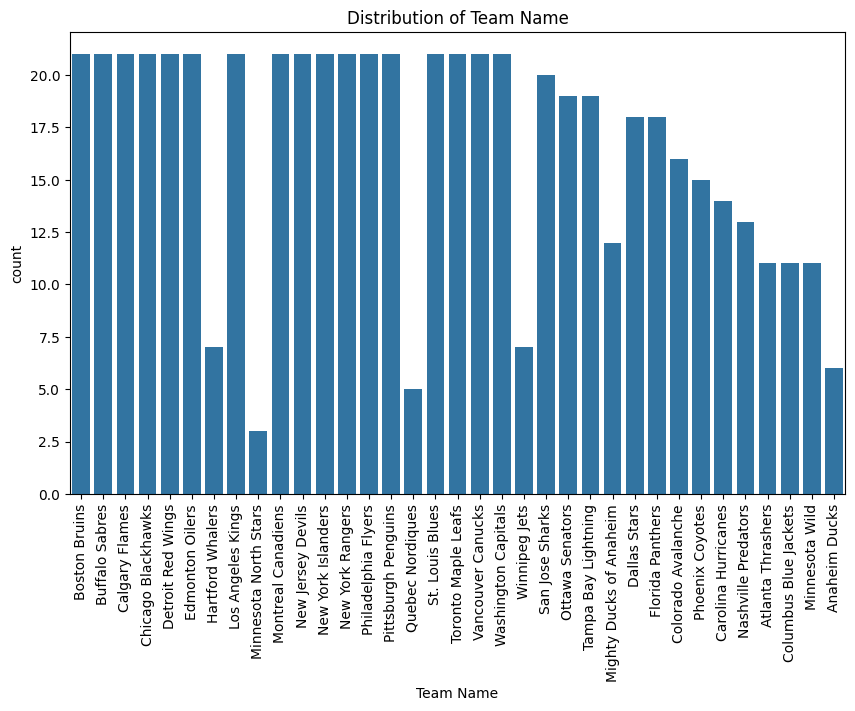

In [17]:
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

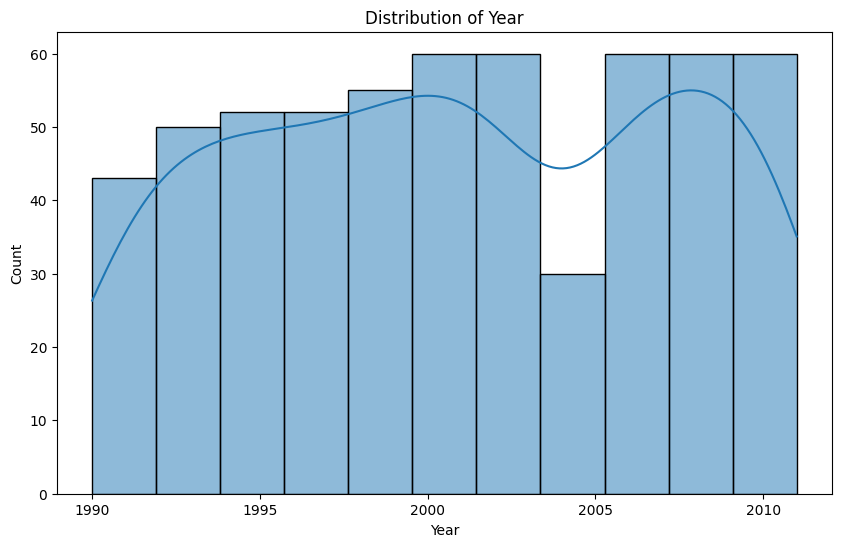

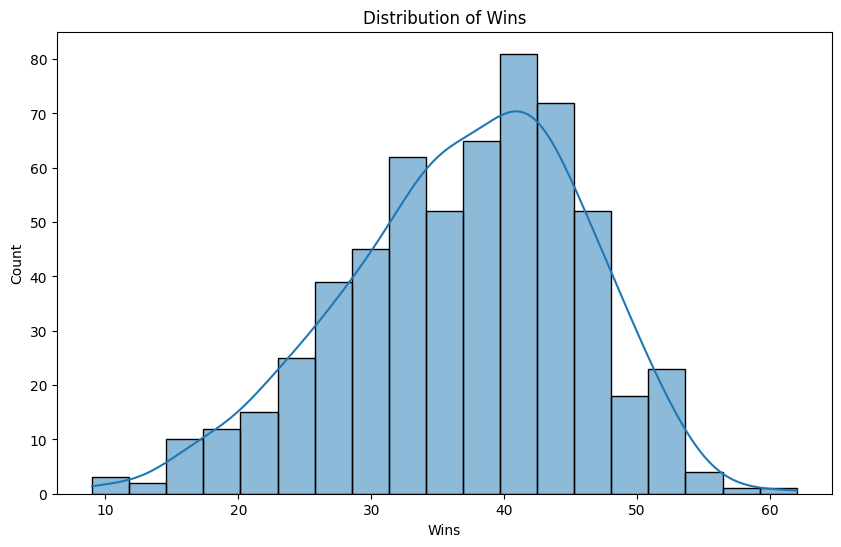

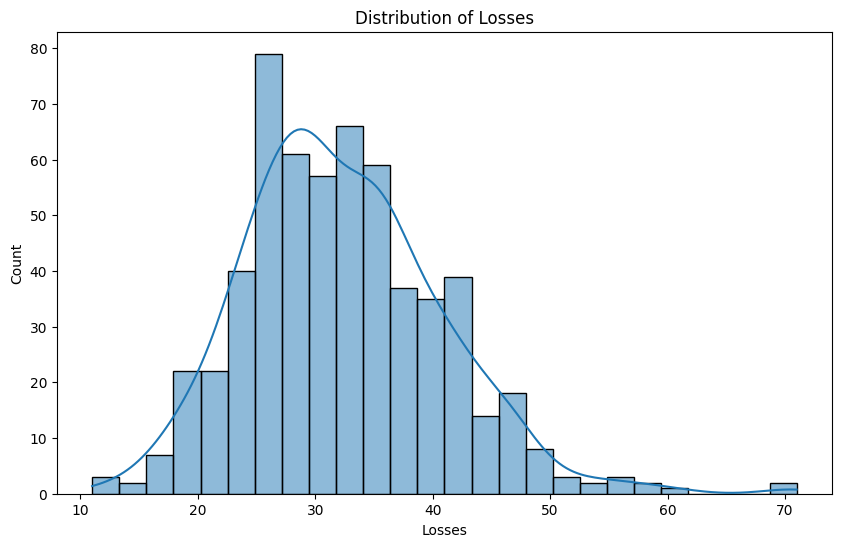

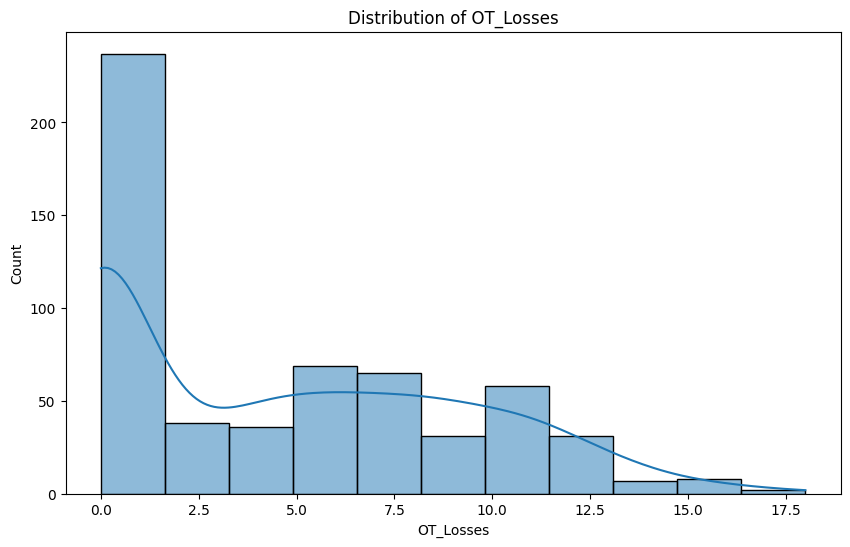

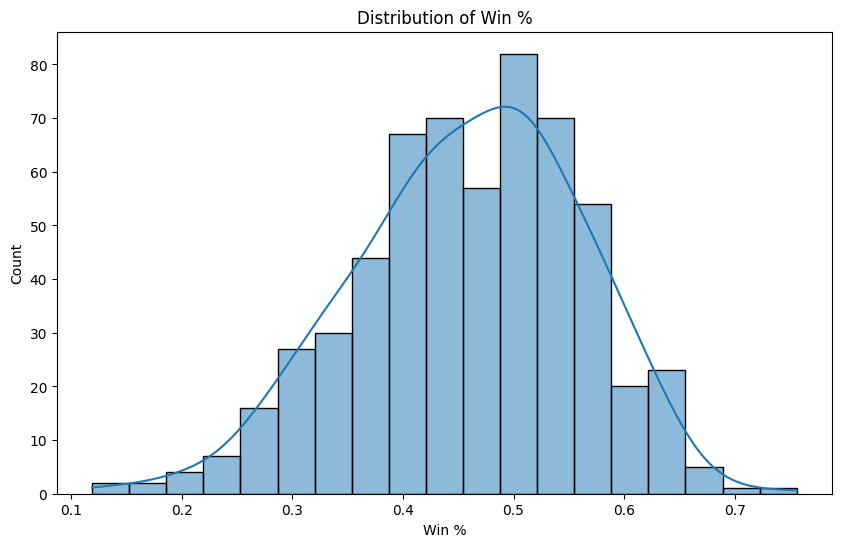

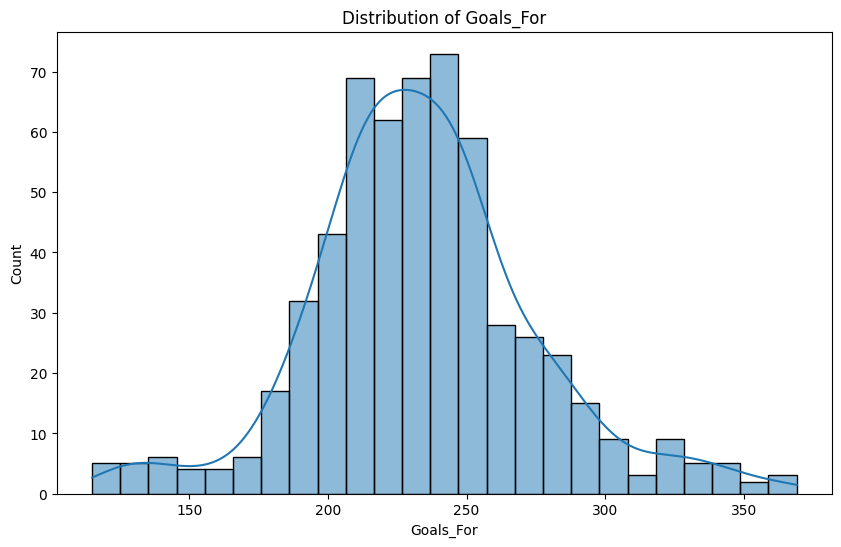

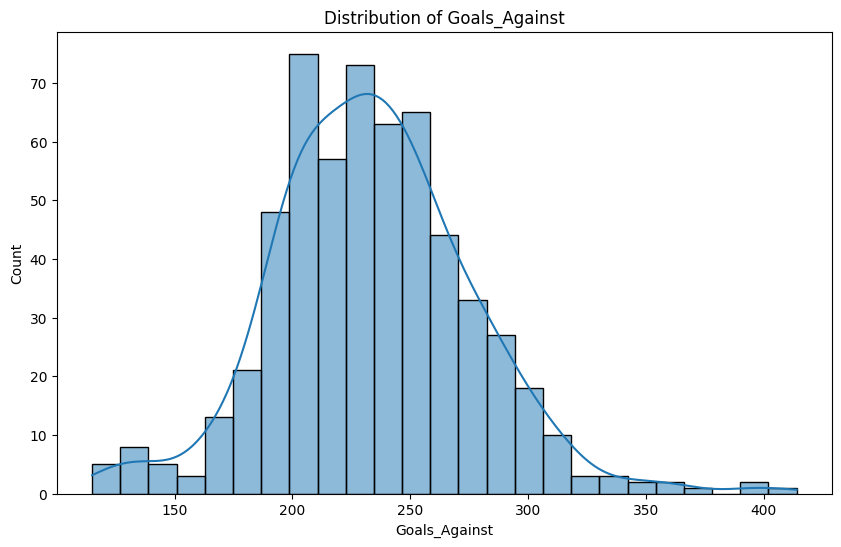

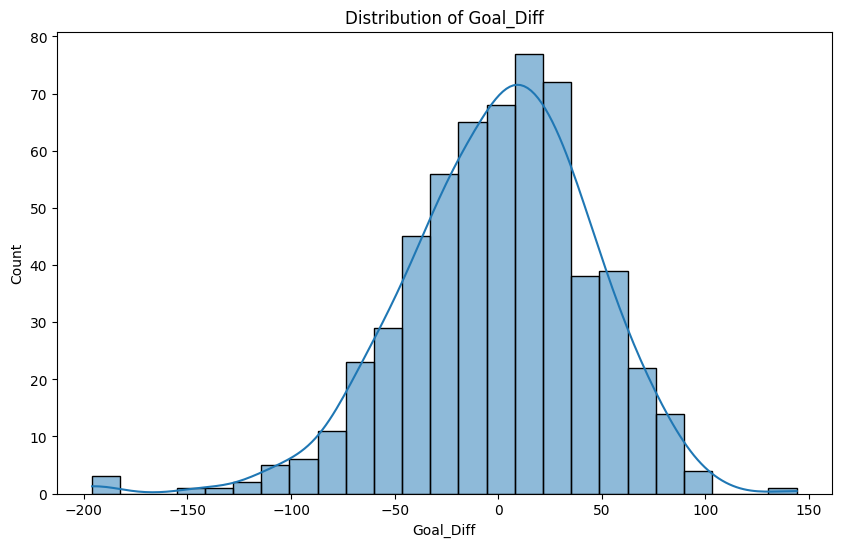

In [18]:
for col in df.select_dtypes(include=['int', 'float']).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

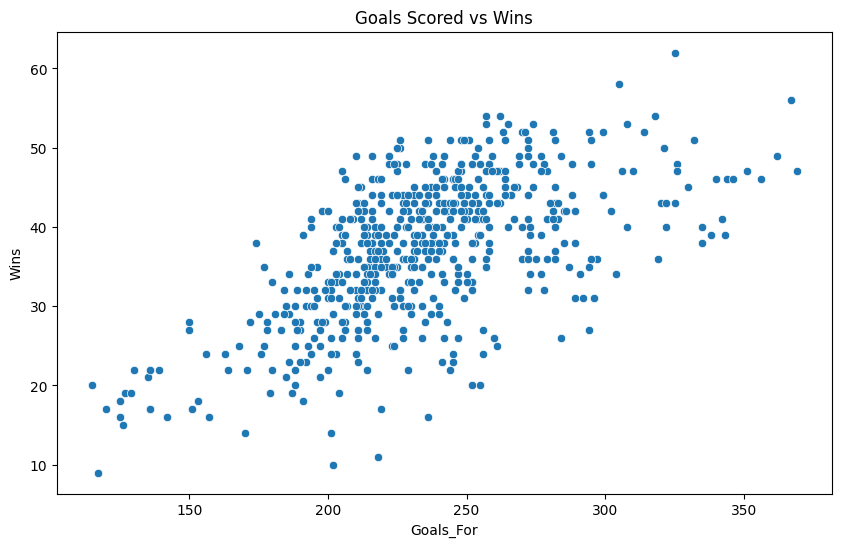

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Goals_For', y='Wins')
plt.title('Goals Scored vs Wins')
plt.show()

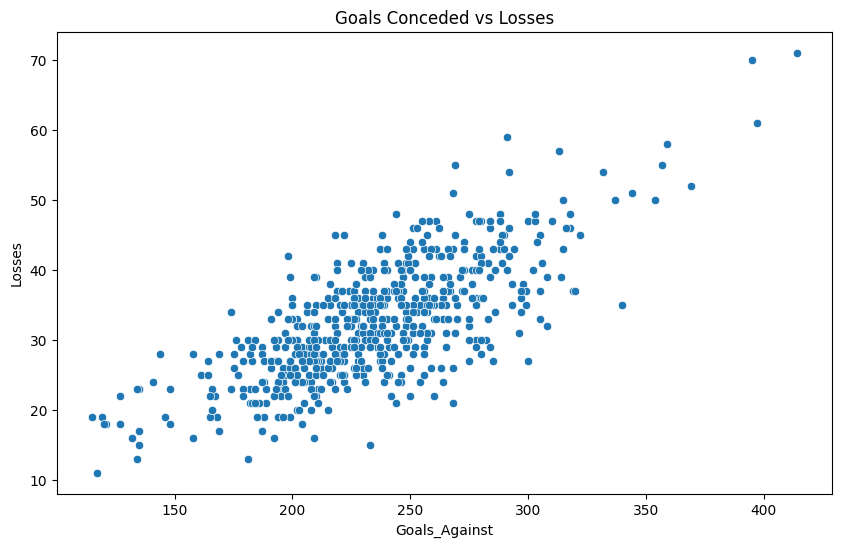

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Goals_Against', y='Losses')
plt.title('Goals Conceded vs Losses')
plt.show()

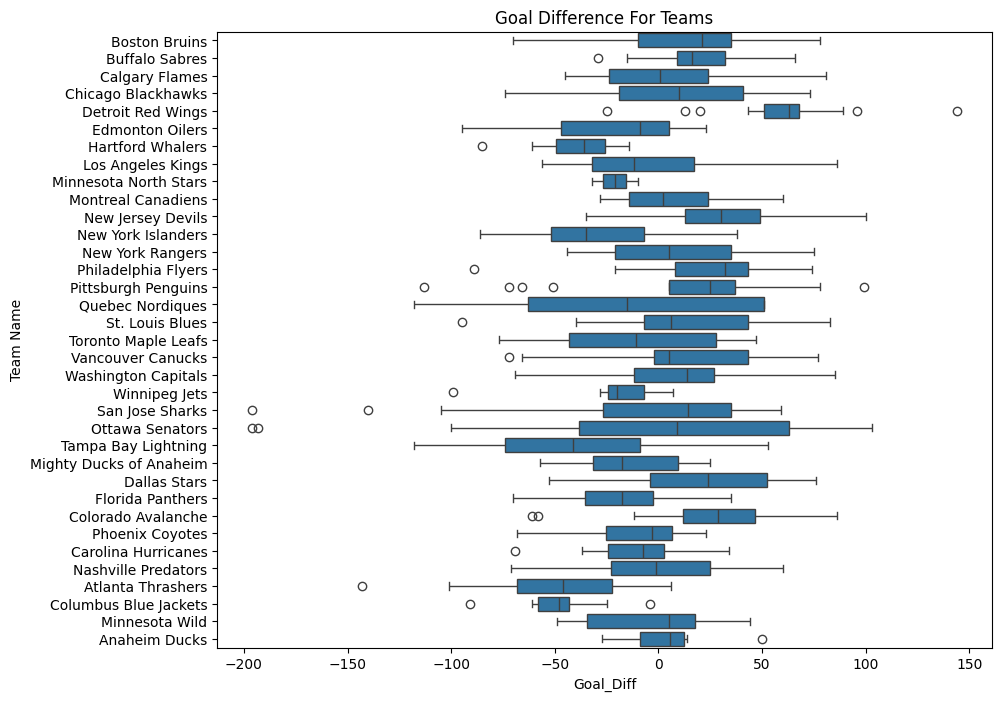

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='Goal_Diff',y='Team Name')
plt.title('Goal Difference For Teams')
plt.xticks(rotation=0)
plt.show()

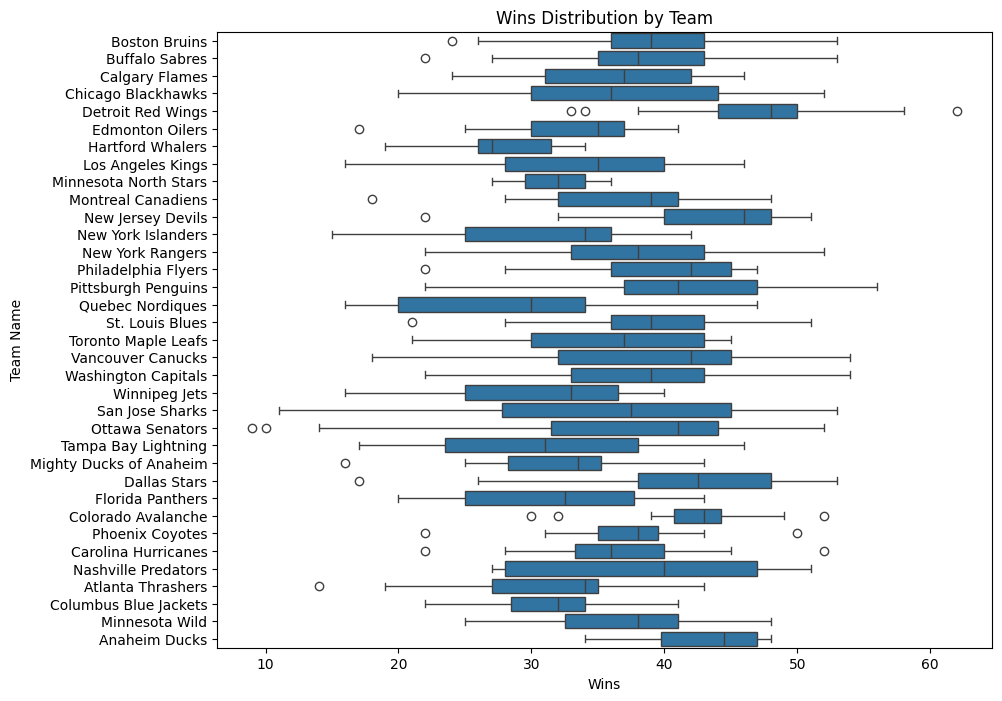

In [22]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Wins', y='Team Name')
plt.title('Wins Distribution by Team')
plt.xticks(rotation=0)
plt.show()


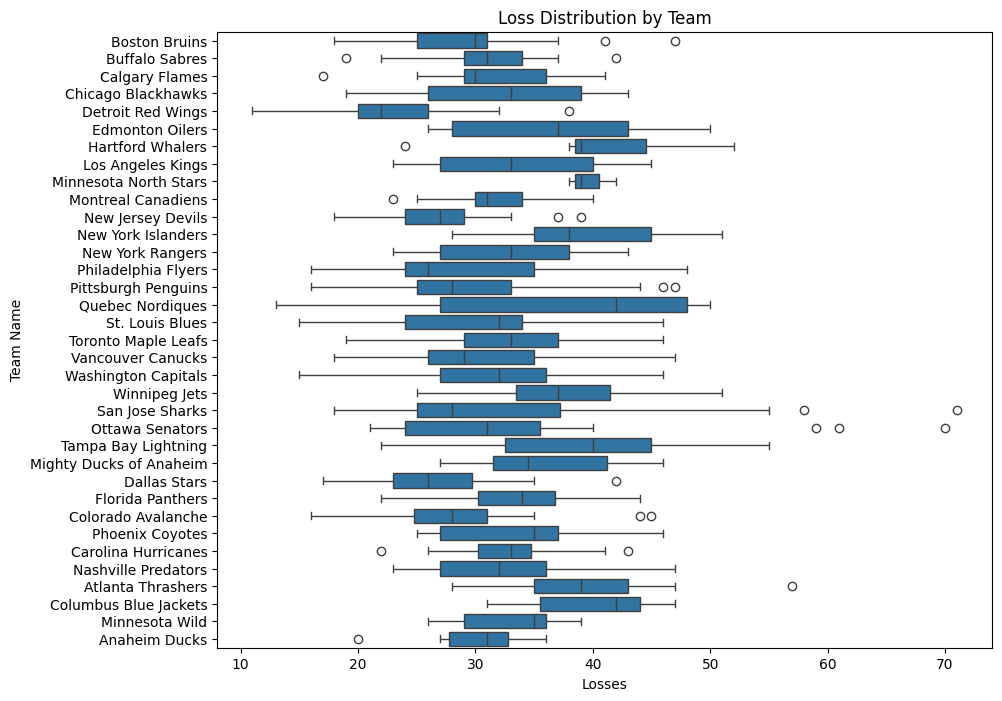

In [23]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Losses', y='Team Name')
plt.title('Loss Distribution by Team')
plt.xticks(rotation=0)
plt.show()


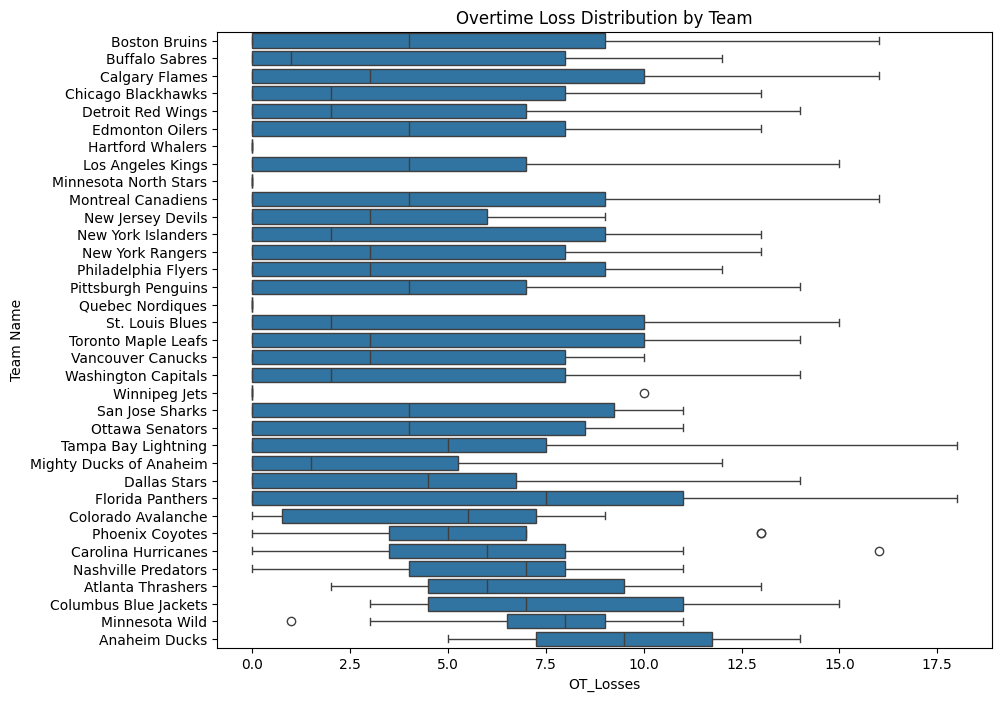

In [24]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='OT_Losses', y='Team Name')
plt.title('Overtime Loss Distribution by Team')
plt.xticks(rotation=0)
plt.show()

In [25]:
top_loss=win_percentage.nsmallest(5,'net_win_pct')
print(top_loss)

                Team Name  Wins  Losses  net_win_pct
13       Hartford Whalers   195     281     0.409664
8   Columbus Blue Jackets   342     441     0.436782
1       Atlanta Thrashers   342     437     0.439024
21     New York Islanders   650     819     0.442478
16  Minnesota North Stars    95     119     0.443925


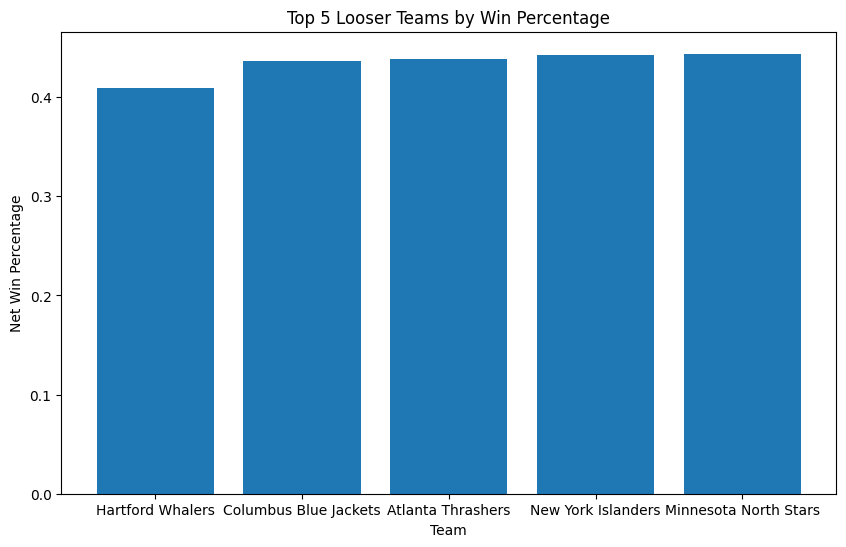

In [26]:
plt.figure(figsize=(10,6))
plt.bar(top_loss['Team Name'],top_loss['net_win_pct'])
plt.xlabel('Team')
plt.ylabel('Net Win Percentage')
plt.title('Top 5 Looser Teams by Win Percentage')
plt.show()